In [ ]:
# Nama  : Alfian Mohamad Firdaus
# NIM   : 1103204002
# Tugas : Lecture 9
# Model : Neural Network
# Dataset : HousePrice

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
import pandas as pd

# Path ke file di Google Drive
file_path = '/content/drive/MyDrive/Dataset/housepricedata.csv'

# Membaca file CSV
df = pd.read_csv(file_path)

# Menampilkan data
print(df.head())


   LotArea  OverallQual  OverallCond  TotalBsmtSF  FullBath  HalfBath  \
0     8450            7            5          856         2         1   
1     9600            6            8         1262         2         0   
2    11250            7            5          920         2         1   
3     9550            7            5          756         1         0   
4    14260            8            5         1145         2         1   

   BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageArea  AboveMedianPrice  
0             3             8           0         548                 1  
1             3             6           1         460                 1  
2             3             6           1         608                 1  
3             3             7           1         642                 0  
4             4             9           1         836                 1  


In [9]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


#Membaca dataset dan memisahkan fitur dan target:

In [12]:
# Misalkan dataset Anda ada di file 'data.csv'
df = pd.read_csv('/content/drive/MyDrive/Dataset/housepricedata.csv')

# Memisahkan fitur dan target
X = df.drop(columns=['AboveMedianPrice'])
y = df['AboveMedianPrice']


#Normalisasi data:

In [13]:
# Normalisasi data fitur
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)


#Membagi data menjadi data train dan data valid/test:

In [14]:
# Membagi data menjadi 70% train dan 30% valid/test
X_train, X_val_test, y_train, y_val_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Membagi data valid/test menjadi 50% valid dan 50% test dari 30% yang tersisa
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)


#Membuat model neural network:

In [15]:
# Membuat model neural network
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Mengkompilasi model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])


#Melatih model:

In [16]:
# Melatih model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/100
32/32 [==============================] - 1s 16ms/step - loss: 0.7074 - accuracy: 0.4912 - val_loss: 0.7059 - val_accuracy: 0.4749
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7002 - accuracy: 0.4883 - val_loss: 0.6995 - val_accuracy: 0.4977
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.4795 - val_loss: 0.6946 - val_accuracy: 0.4429
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5568 - val_loss: 0.6906 - val_accuracy: 0.5845
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.6399 - val_loss: 0.6868 - val_accuracy: 0.6347
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6839 - accuracy: 0.6781 - val_loss: 0.6835 - val_accuracy: 0.6530
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6811 - accuracy: 0.6194 - val_loss: 0.6806 - val_accuracy: 0.6530
Epoch 8/100


#Visualisasi loss dan akurasi selama training:


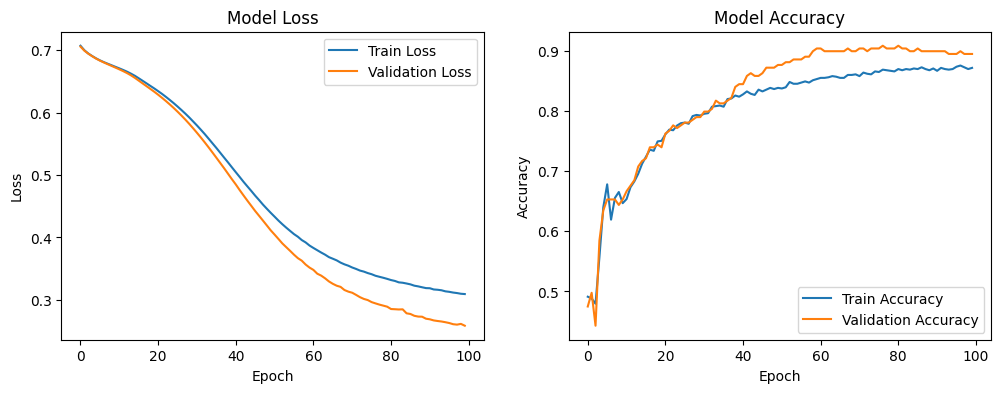

In [17]:
# Visualisasi loss dan akurasi
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
